In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

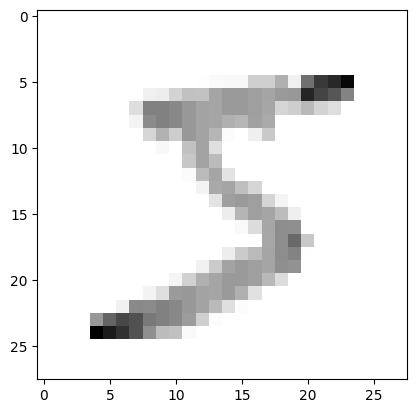

In [12]:
def draw(n):
    plt.imshow(n,cmap=plt.cm.binary)
    plt.show()

draw(x_train[0])

In [20]:
#there are two types of models
#sequential is most common, why?

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
#reshape

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=3)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8676 - loss: 0.4676
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9653 - loss: 0.1113
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9771 - loss: 0.0713


In [14]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9621 - loss: 0.1234
loss->  0.1095370203256607 
acc->  0.9667999744415283


 57/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


label ->  1
prediction ->  1


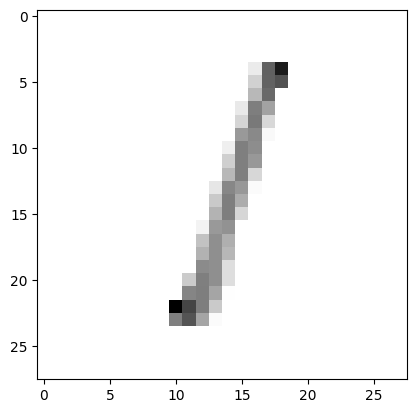

In [15]:
predictions=model.predict([x_test])
print('label -> ',y_test[2])
print('prediction -> ',np.argmax(predictions[2]))

draw(x_test[2])

In [18]:
#saving the model
# .h5 or .model can be used

model.save('epic_num_reader.keras')